<a href="https://colab.research.google.com/github/LisamShoe/Heart-Disease-Kaggle-Project/blob/master/Modeling_And_Predicting_for_the_Heart_Disease_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling And Predicting for the Heart Disease Data Set
Your modeling notebook should include each of the following:
* (Feature engineering, if not captured in the EDA notebook. Sometimes it is 
easier or makes more sense to do feature engineering in the same notebook as your model.)
* Splitting data into train/test sets
* Build (at least one) model
* Predict test set using model(s)
* A quantiative metric of model(s) performance

Based on the Exploratory Data Analysis that I did here: https://github.com/LisamShoe/Heart-Disease-Kaggle-Project/blob/master/Heart_Disease_EDA.ipynb

I am going to import the data into a few different dataframes to be able to run models to find the best predictors.


*   df is the original data with rows dropped that are outliers or missing data. This has all of the categorical data stored as numbers.
*   eng_df is the daata above transformed to have desctiptive strings in english to categorize the categorical data.
* female_df is the original data, but only the females to see if we can get beter predictors using different models for men and women.
* male_df is the original data, but only the females to see if we can get beter predictors using different models for men and women.

I am also going to use normalized versions of df, female_df and male_df to test if the normalized versions work better


# Load Data and Divide

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Import Data Set
df = pd.read_csv("https://raw.githubusercontent.com/LisamShoe/Heart-Disease-Kaggle-Project/master/heart.csv")
# Drop out extraneous rows based on EDA. Index values of rows to drop: 85, 92, 158, 163, 164, 251
df.drop([85, 92, 158, 163, 164, 251], axis=0, inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#English Categorized Data
eng_df = df
#assign male and female
sex_dict = {0: "female", 1:"male"}
eng_df["sex"] = eng_df["sex"].map(sex_dict)
#chest pain categories
cp_dict = {0: "asymptomatic", 1:"atypical angina", 2:"non-anginal pain", 3:"typical angina"}
eng_df["cp"] = eng_df["cp"].map(cp_dict)
#rest ecg categories
restecg_dict = {0: "left ventricular hypertrophy", 1:"normal", 2:"ST-T wave abnormality"}
eng_df["restecg"] = eng_df["restecg"].map(restecg_dict)
#target
target_dict = {0: "disease", 1:"no disease"}
eng_df["target"] = eng_df["target"].map(target_dict)

#I'm leaving Fasting Blood Sugar but 0 is low and 1 is high meaning 1 is prediabetic or diabetic
eng_df = eng_df.rename(columns={"cp": "chest pain", "trestbps": "resting blood pressure", "chol":"cholesterol", "fbs":"fasting blood sugar", "thalach":"max heart rate", "exang":"exercise angina", "ca":"major vessels"})

eng_df.head()

,age,sex,chest pain,resting blood pressure,cholesterol,fasting blood sugar,restecg,max heart rate,exercise angina,oldpeak,slope,major vessels,thal,target
0,63,male,typical angina,145,233,1,left ventricular hypertrophy,150,0,2.3,0,0,1,no disease
1,37,male,non-anginal pain,130,250,0,normal,187,0,3.5,0,0,2,no disease
2,41,female,atypical angina,130,204,0,left ventricular hypertrophy,172,0,1.4,2,0,2,no disease
3,56,male,atypical angina,120,236,0,normal,178,0,0.8,2,0,2,no disease
4,57,female,asymptomatic,120,354,0,normal,163,1,0.6,2,0,2,no disease


In [4]:
#translating the english into one-hot encoding to be able to feed into models
onehot_df = pd.get_dummies(eng_df, columns=['sex','chest pain', 'restecg'])
onehot_df

,age,resting blood pressure,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,slope,major vessels,thal,target,sex_female,sex_male,chest pain_asymptomatic,chest pain_atypical angina,chest pain_non-anginal pain,chest pain_typical angina,restecg_ST-T wave abnormality,restecg_left ventricular hypertrophy,restecg_normal
0,63,145,233,1,150,0,2.3,0,0,1,no disease,0,1,0,0,0,1,0,1,0
1,37,130,250,0,187,0,3.5,0,0,2,no disease,0,1,0,0,1,0,0,0,1
2,41,130,204,0,172,0,1.4,2,0,2,no disease,1,0,0,1,0,0,0,1,0
3,56,120,236,0,178,0,0.8,2,0,2,no disease,0,1,0,1,0,0,0,0,1
4,57,120,354,0,163,1,0.6,2,0,2,no disease,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,0,123,1,0.2,1,0,3,disease,1,0,1,0,0,0,0,0,1
299,45,110,264,0,132,0,1.2,1,0,3,disease,0,1,0,0,0,1,0,0,1
300,68,144,193,1,141,0,3.4,1,2,3,disease,0,1,1,0,0,0,0,0,1
301,57,130,131,0,115,1,1.2,1,1,3,disease,0,1,1,0,0,0,0,0,1


In [5]:
#Normalizing the data before creating splits between male and female so that I can do the splits at the same time
#For some reason the mapping done in the previous cell also overwrites the values in df even though I sepcified eng_df in all of the renaming. 
#To correct this, I will run the code from the Import and clean cell again.
df = pd.read_csv("https://raw.githubusercontent.com/LisamShoe/Heart-Disease-Kaggle-Project/master/heart.csv")
df.drop([85, 92, 158, 163, 164, 251], axis=0, inplace=True)
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.367698,1.0,0.0,0.603053,0.0,0.370968,0.0,0.000000,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.426117,0.0,0.5,0.885496,0.0,0.564516,0.0,0.000000,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.268041,0.0,0.0,0.770992,0.0,0.225806,1.0,0.000000,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.378007,0.0,0.5,0.816794,0.0,0.129032,1.0,0.000000,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.783505,0.0,0.5,0.702290,1.0,0.096774,1.0,0.000000,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.395189,0.0,0.5,0.396947,1.0,0.032258,0.5,0.000000,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.474227,0.0,0.5,0.465649,0.0,0.193548,0.5,0.000000,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.230241,1.0,0.5,0.534351,0.0,0.548387,0.5,0.666667,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.017182,0.0,0.5,0.335878,1.0,0.193548,0.5,0.333333,1.000000,0.0


In [6]:
female_df = df[df['sex'] == 0]
male_df = df[df['sex'] == 1]
normalized_f_df = normalized_df[normalized_df['sex'] == 0]
normalized_m_df = normalized_df[normalized_df['sex'] == 1]
normalized_f_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,0.250000,0.0,0.333333,0.339623,0.268041,0.0,0.0,0.770992,0.0,0.225806,1.0,0.000000,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.783505,0.0,0.5,0.702290,1.0,0.096774,1.0,0.000000,0.666667,1.0
6,0.562500,0.0,0.333333,0.433962,0.577320,0.0,0.0,0.625954,0.0,0.209677,0.5,0.000000,0.666667,1.0
11,0.395833,0.0,0.666667,0.339623,0.512027,0.0,0.5,0.519084,0.0,0.032258,1.0,0.000000,0.666667,1.0
14,0.604167,0.0,1.000000,0.528302,0.539519,1.0,0.0,0.694656,0.0,0.161290,1.0,0.000000,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0.541667,0.0,0.000000,0.320755,0.271478,0.0,1.0,0.450382,1.0,0.322581,0.5,0.333333,1.000000,0.0
292,0.604167,0.0,0.000000,0.716981,0.340206,1.0,0.0,0.572519,1.0,0.451613,0.5,0.666667,0.333333,0.0
296,0.708333,0.0,0.000000,0.283019,0.243986,0.0,0.5,0.496183,1.0,0.000000,0.5,0.000000,0.666667,0.0
298,0.583333,0.0,0.000000,0.433962,0.395189,0.0,0.5,0.396947,1.0,0.032258,0.5,0.000000,1.000000,0.0


### Some Models perform better with less input columns. Here's a check to some correlations

I am using the absoulte of the correlation because the number 1 is high correlation and -1 is high negative correlation, which can be equally as useful, so I want to see the numbers closest to 1 and -1. These are easiest to visually compare when both are between 0 and 1

In [7]:
abs(df.corr())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,0.083035,0.065925,0.294691,0.185768,0.132048,0.108174,0.397342,0.100344,0.198148,0.158937,0.369487,0.061014,0.229524
sex,0.083035,1.000000,0.050062,0.063643,0.173565,0.042146,0.070053,0.047775,0.143497,0.109087,0.038084,0.086967,0.217105,0.287036
cp,0.065925,0.050062,1.000000,0.047752,0.094081,0.109508,0.036169,0.287586,0.386488,0.146330,0.111870,0.223416,0.159570,0.425358
trestbps,0.294691,0.063643,0.047752,1.000000,0.157286,0.179427,0.120636,0.049409,0.067633,0.198999,0.128978,0.100795,0.069598,0.145789
chol,0.185768,0.173565,0.094081,0.157286,1.000000,0.017997,0.130037,0.009804,0.078803,0.036726,0.019915,0.146571,0.078601,0.100687
fbs,0.132048,0.042146,0.109508,0.179427,0.017997,1.000000,0.074128,0.002047,0.009705,0.008506,0.053468,0.143802,0.040677,0.013379
restecg,0.108174,0.070053,0.036169,0.120636,0.130037,0.074128,1.000000,0.037294,0.060959,0.050923,0.083244,0.113269,0.003379,0.127977
thalach,0.397342,0.047775,0.287586,0.049409,0.009804,0.002047,0.037294,1.000000,0.375010,0.341322,0.381868,0.262586,0.092476,0.417164
exang,0.100344,0.143497,0.386488,0.067633,0.078803,0.009705,0.060959,0.375010,1.000000,0.289534,0.254525,0.142674,0.206192,0.427991
oldpeak,0.198148,0.109087,0.146330,0.198999,0.036726,0.008506,0.050923,0.341322,0.289534,1.000000,0.578132,0.295813,0.211900,0.431618


In [8]:
abs(female_df.corr())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,NaN,0.042740,0.330028,0.230877,0.129998,0.000643,0.414705,0.025995,0.187851,0.054979,0.404493,0.119702,0.216938
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,0.042740,NaN,1.000000,0.149352,0.125618,0.020342,0.083732,0.124913,0.430631,0.271751,0.288619,0.255866,0.285839,0.519812
trestbps,0.330028,NaN,0.149352,1.000000,0.227524,0.233623,0.035639,0.103525,0.315445,0.397557,0.256410,0.283732,0.221855,0.388733
chol,0.230877,NaN,0.125618,0.227524,1.000000,0.184531,0.250296,0.010497,0.138261,0.096437,0.191201,0.148811,0.195298,0.171454
fbs,0.129998,NaN,0.020342,0.233623,0.184531,1.000000,0.168573,0.158817,0.166832,0.115672,0.043939,0.263285,0.044784,0.216463
restecg,0.000643,NaN,0.083732,0.035639,0.250296,0.168573,1.000000,0.065213,0.011853,0.091199,0.072624,0.122843,0.027781,0.039124
thalach,0.414705,NaN,0.124913,0.103525,0.010497,0.158817,0.065213,1.000000,0.124217,0.252843,0.333512,0.142687,0.136702,0.250098
exang,0.025995,NaN,0.430631,0.315445,0.138261,0.166832,0.011853,0.124217,1.000000,0.156210,0.273712,0.020615,0.257215,0.484805
oldpeak,0.187851,NaN,0.271751,0.397557,0.096437,0.115672,0.091199,0.252843,0.156210,1.000000,0.588783,0.467979,0.373970,0.506418


In [9]:
abs(male_df.corr())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,NaN,0.083283,0.268990,0.138865,0.139436,0.177256,0.402063,0.152700,0.219708,0.213911,0.369258,0.071111,0.288099
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,0.083283,NaN,1.000000,0.140464,0.095136,0.147613,0.009166,0.343442,0.366340,0.088892,0.037944,0.206111,0.117062,0.395772
trestbps,0.268990,NaN,0.140464,1.000000,0.092854,0.159258,0.178371,0.030797,0.032760,0.111569,0.069337,0.020538,0.041333,0.071310
chol,0.138865,NaN,0.095136,0.092854,1.000000,0.064505,0.073830,0.034175,0.092447,0.034413,0.091612,0.178317,0.099661,0.158108
fbs,0.139436,NaN,0.147613,0.159258,0.064505,1.000000,0.026595,0.056187,0.057083,0.041533,0.090643,0.092718,0.078478,0.079225
restecg,0.177256,NaN,0.009166,0.178371,0.073830,0.026595,1.000000,0.076434,0.080180,0.020663,0.085054,0.101315,0.007334,0.146698
thalach,0.402063,NaN,0.343442,0.030797,0.034175,0.056187,0.076434,1.000000,0.456666,0.371109,0.398969,0.301848,0.071358,0.480260
exang,0.152700,NaN,0.366340,0.032760,0.092447,0.057083,0.080180,0.456666,1.000000,0.326302,0.243627,0.173969,0.162471,0.380494
oldpeak,0.219708,NaN,0.088892,0.111569,0.034413,0.041533,0.020663,0.371109,0.326302,1.000000,0.573235,0.215822,0.144566,0.387134


In [10]:
#this reduces our columns by about half based on the correlations on the primary data set
reduced_columns = ['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [11]:
#I'm going to go ahead and create reduced_df, if the reduced gets a better score we can go back and see if m or f reduced also gets better scores
reduced_df = df[reduced_columns]

# Models
I will use Train Test Split to split the models each time before running models so that I can reuse variable names and I will use the same seed to control the randomness

## Regression

In [12]:
r_state = 52

In [13]:
#Split Data
X = df.drop(columns =['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=r_state)

In [14]:
logistic_model = LogisticRegression(random_state=35)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8080808080808081

In [15]:
X = female_df.drop(columns =['target'])
y = female_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
f_model = LogisticRegression(random_state=r_state)
f_model.fit(X_train, y_train)
f_model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.84375

In [16]:
X = male_df.drop(columns =['target'])
y = male_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
m_model = LogisticRegression(random_state=r_state)
m_model.fit(X_train, y_train)
m_model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8059701492537313

In [17]:
#On Normalized data
X = normalized_df.drop(columns =['target'])
y = normalized_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
norm_model = LogisticRegression(random_state=r_state)
norm_model.fit(X_train, y_train)
norm_model.score(X_test, y_test)

0.8181818181818182

In [18]:
#On One-Hot encoded data
X = onehot_df.drop(columns =['target'])
y = onehot_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
norm_model = LogisticRegression(random_state=r_state)
norm_model.fit(X_train, y_train)
norm_model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8484848484848485

In [19]:
#on Column reduced
X = reduced_df.drop(columns =['target'])
y = reduced_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
reduced_model = LogisticRegression(random_state=r_state)
reduced_model.fit(X_train, y_train)
reduced_model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8787878787878788

Results: 
- General: .80
- Female: .84
- Male: .80
- Normalized: .81
- One-hot: .84
- Reduced to only Higher correlated Columns: .87

In [20]:
#trying out male and female normalized
X = normalized_m_df.drop(columns =['target'])
y = normalized_m_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
norm_m_model = LogisticRegression(random_state=r_state)
norm_m_model.fit(X_train, y_train)
norm_m_model.score(X_test, y_test)

0.7761194029850746

In [21]:
#trying out male and female normalized
X = normalized_f_df.drop(columns =['target'])
y = normalized_f_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
norm_f_model = LogisticRegression(random_state=r_state)
norm_f_model.fit(X_train, y_train)
norm_f_model.score(X_test, y_test)

0.90625

The normalized male model underperforms, but the normalized female model does better

In [22]:
#combining highest: One-hot, female, highly correlated:
log_f_df = pd.get_dummies(female_df[reduced_columns], columns=['cp'])
log_f_df

,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3
2,172,0,1.4,2,0,2,1,0,1,0,0
4,163,1,0.6,2,0,2,1,1,0,0,0
6,153,0,1.3,1,0,2,1,0,1,0,0
11,139,0,0.2,2,0,2,1,0,0,1,0
14,162,0,1.0,2,0,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
289,130,1,2.0,1,1,3,0,1,0,0,0
292,146,1,2.8,1,2,1,0,1,0,0,0
296,136,1,0.0,1,0,2,0,1,0,0,0
298,123,1,0.2,1,0,3,0,1,0,0,0


In [23]:
X = log_f_df.drop(columns =['target'])
y = log_f_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
reduced_model = LogisticRegression(random_state=r_state)
reduced_model.fit(X_train, y_train)
reduced_model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.90625

In [24]:
#checking for sanity on the whole
log_df =  pd.get_dummies(reduced_df, columns=['cp'])

In [25]:
X = log_df.drop(columns =['target'])
y = log_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
reduced_model = LogisticRegression(random_state=r_state)
reduced_model.fit(X_train, y_train)
reduced_model.score(X_test, y_test)

0.8585858585858586

In [26]:
#checking for sanity on the males
log_m_df = pd.get_dummies(male_df[reduced_columns], columns=['cp'])
X = log_m_df.drop(columns =['target'])
y = log_m_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
reduced_model = LogisticRegression(random_state=r_state)
reduced_model.fit(X_train, y_train)
reduced_model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7761194029850746

Results:

- General: .80
- Female: .84
- Male: .80
- Normalized: .81
- One-hot: .84
- Reduced to only Higher correlated Columns: .87


- Combining highest: One-hot, female, highly correlated: .90
- One-hot, highly correlated: .85
- Male One-hot, highly correlated: .77

There is a higher prediction accuracy for females than males

## Decision Trees

In [27]:
#Load into X and Y
X = df.drop(columns =['target'])
y = df['target']
#Shuffle and Split using Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
model = tree.DecisionTreeClassifier(max_depth=3, random_state=r_state)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.797979797979798

In [28]:
X = female_df.drop(columns =['target'])
y = female_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
f_model = tree.DecisionTreeClassifier(max_depth=3, random_state=r_state)
f_model.fit(X_train, y_train)
f_model.score(X_test, y_test)

0.875

In [29]:
X = male_df.drop(columns =['target'])
y = male_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
m_model = tree.DecisionTreeClassifier(max_depth=3, random_state=r_state)
m_model.fit(X_train, y_train)
m_model.score(X_test, y_test)

0.6716417910447762

In [30]:
#On Normalized data
X = normalized_df.drop(columns =['target'])
y = normalized_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
norm_model = tree.DecisionTreeClassifier(max_depth=3, random_state=r_state)
norm_model.fit(X_train, y_train)
norm_model.score(X_test, y_test)

0.797979797979798

In [31]:
#on Column reduced
X = reduced_df.drop(columns =['target'])
y = reduced_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
reduced_model = tree.DecisionTreeClassifier(max_depth=3, random_state=r_state)
reduced_model.fit(X_train, y_train)
reduced_model.score(X_test, y_test)

0.797979797979798

In [32]:
#On One-Hot encoded data
X = onehot_df.drop(columns =['target'])
y = onehot_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
norm_model = tree.DecisionTreeClassifier(max_depth=3, random_state=r_state)
norm_model.fit(X_train, y_train)
norm_model.score(X_test, y_test)

0.797979797979798

Results:

- General: .79
- Female: .87
- Male: .67
- Normalized: .79
- One-hot: .79
- Reduced to only Higher correlated Columns: .79

The Decision tree model is easier to use by humans. The Scores for the General, Normalized, One-Hot, and reduced columns are exactly the same scores to each other showing no need to transform the data, but the reduced columns could let us know only what data to collect. The rate of female is .87 which is higher than the original linear regression, but we are unlikely to get that number higher with any transformation.

We can use a decision tree visualization to help humans classify without the model being present.

### Decison Tree Visualizations

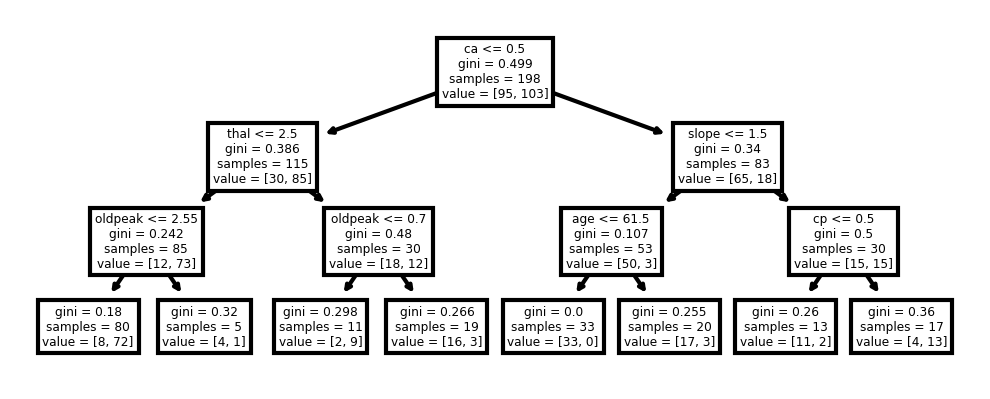

In [33]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,1.5), dpi=300)
tree.plot_tree(model, feature_names=df.columns.values.tolist())
plt.show()

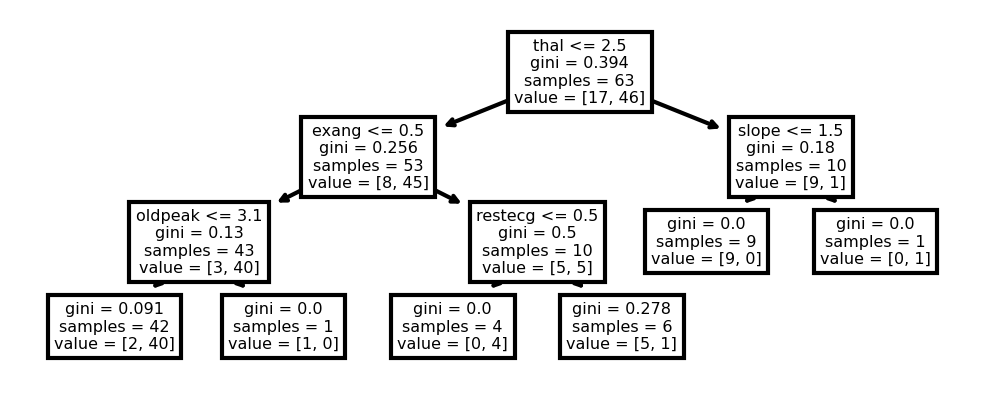

In [34]:
#On just the female model
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,1.5), dpi=300)
tree.plot_tree(f_model, feature_names=female_df.columns.values.tolist())
plt.show()

## Random Forest

In [35]:
#Load into X and Y
X = df.drop(columns =['target'])
y = df['target']
#Shuffle and Split using Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
model = RandomForestClassifier(random_state=r_state)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8181818181818182

In [36]:
X = female_df.drop(columns =['target'])
y = female_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
f_model = RandomForestClassifier(random_state=r_state)
f_model.fit(X_train, y_train)
f_model.score(X_test, y_test)

0.875

In [37]:
X = male_df.drop(columns =['target'])
y = male_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
m_model = RandomForestClassifier(random_state=r_state)
m_model.fit(X_train, y_train)
m_model.score(X_test, y_test)

0.746268656716418

In [38]:
#On Normalized data
X = normalized_df.drop(columns =['target'])
y = normalized_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
norm_model = RandomForestClassifier(random_state=r_state)
norm_model.fit(X_train, y_train)
norm_model.score(X_test, y_test)

0.8181818181818182

In [39]:
#On One-Hot encoded data
X = onehot_df.drop(columns =['target'])
y = onehot_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
norm_model = RandomForestClassifier(random_state=r_state)
norm_model.fit(X_train, y_train)
norm_model.score(X_test, y_test)

0.8181818181818182

In [40]:
#on Column reduced
X = reduced_df.drop(columns =['target'])
y = reduced_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
reduced_model = RandomForestClassifier(random_state=r_state)
reduced_model.fit(X_train, y_train)
reduced_model.score(X_test, y_test)

0.8585858585858586

Results:

- General: .81
- Female: .87
- Male: .74
- Normalized: .81
- One-hot: .81
- Reduced to only Higher correlated Columns: .85

On Random Forest, it looks like higher correlated data outperforms the whole data. Many of the numbers are about as good as the decison trees.

In [41]:
#combining highest: One-hot, female, highly correlated:
comb_f_df = pd.get_dummies(female_df[reduced_columns], columns=['cp'])
X = comb_f_df.drop(columns =['target'])
y = comb_f_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
reduced_model = RandomForestClassifier(random_state=r_state)
reduced_model.fit(X_train, y_train)
reduced_model.score(X_test, y_test)

0.90625

Random Forest seems to perform as well as Logistic Regression on the one-hot, female, and highly correlated data

## AdaBoost

In [42]:
#Load into X and Y
X = df.drop(columns =['target'])
y = df['target']
#Shuffle and Split using Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
model = AdaBoostClassifier(n_estimators=25, random_state=r_state)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.797979797979798

In [43]:
X = female_df.drop(columns =['target'])
y = female_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
f_model = AdaBoostClassifier(n_estimators=25, random_state=r_state)
f_model.fit(X_train, y_train)
f_model.score(X_test, y_test)

0.875

In [44]:
X = male_df.drop(columns =['target'])
y = male_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
m_model = AdaBoostClassifier(n_estimators=25, random_state=r_state)
m_model.fit(X_train, y_train)
m_model.score(X_test, y_test)

0.8208955223880597

In [45]:
#On Normalized data
X = normalized_df.drop(columns =['target'])
y = normalized_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
norm_model = AdaBoostClassifier(n_estimators=25, random_state=r_state)
norm_model.fit(X_train, y_train)
norm_model.score(X_test, y_test)

0.797979797979798

In [46]:
#On One-Hot encoded data
X = onehot_df.drop(columns =['target'])
y = onehot_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
norm_model = AdaBoostClassifier(n_estimators=25, random_state=r_state)
norm_model.fit(X_train, y_train)
norm_model.score(X_test, y_test)

0.797979797979798

In [47]:
#on Column reduced
X = reduced_df.drop(columns =['target'])
y = reduced_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
reduced_model = AdaBoostClassifier(n_estimators=25, random_state=r_state)
reduced_model.fit(X_train, y_train)
reduced_model.score(X_test, y_test)

0.7575757575757576

Results:

- General: .79
- Female: .87
- Male: .82
- Normalized: .79
- One-hot: .79
- Reduced to only Higher correlated Columns: .75

AdaBoost has the highest prediction for the Male dataset so far. The General is about as good as the other models. It appears that normalizing the data and applying one-hot has little to no effect on the output. The reducing to less columns actually gives a lower number. Separating the data into male and female gives better prediction than leaving them together.

## KNN

In [48]:
#Load into X and Y
X = df.drop(columns =['target'])
y = df['target']
#Shuffle and Split using Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6767676767676768

In [49]:
X = female_df.drop(columns =['target'])
y = female_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
f_model = KNeighborsClassifier(n_neighbors=11)
f_model.fit(X_train, y_train)
f_model.score(X_test, y_test)

0.8125

In [50]:
X = male_df.drop(columns =['target'])
y = male_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
m_model = KNeighborsClassifier(n_neighbors=11)
m_model.fit(X_train, y_train)
m_model.score(X_test, y_test)

0.6865671641791045

In [51]:
#On Normalized data
X = normalized_df.drop(columns =['target'])
y = normalized_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
norm_model = KNeighborsClassifier(n_neighbors=11)
norm_model.fit(X_train, y_train)
norm_model.score(X_test, y_test)

0.8383838383838383

In [52]:
#On One-Hot encoded data
X = onehot_df.drop(columns =['target'])
y = onehot_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
norm_model = KNeighborsClassifier(n_neighbors=11)
norm_model.fit(X_train, y_train)
norm_model.score(X_test, y_test)

0.6767676767676768

In [53]:
#on Column reduced
X = reduced_df.drop(columns =['target'])
y = reduced_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
reduced_model = KNeighborsClassifier(n_neighbors=11)
reduced_model.fit(X_train, y_train)
reduced_model.score(X_test, y_test)

0.6868686868686869

Results:

- General: .67
- Female: .81
- Male: .68
- Normalized: .83
- One-hot: .67
- Reduced to only Higher correlated Columns: .68

KNN model seems to overall underperform the other models. 
KNN vastly improved when normalized and slightly improves on the highly correlated columns.

In [54]:
#combining highest: normalized, separated by gender
X = normalized_f_df.drop(columns =['target'])
y = normalized_f_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
knn_f_model = KNeighborsClassifier(n_neighbors=11)
knn_f_model.fit(X_train, y_train)
knn_f_model.score(X_test, y_test)

0.78125

In [55]:
X = normalized_m_df.drop(columns =['target'])
y = normalized_m_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
knn_m_model = KNeighborsClassifier(n_neighbors=11)
knn_m_model.fit(X_train, y_train)
knn_m_model.score(X_test, y_test)

0.8059701492537313

Interestingly, Male performs higher as normalized, but Female performs lower

# Overall results

In [56]:
d = {'Type of Model': ['Logistic Regression', 'Decision Tree','Random Forest', 'AdaBoost', 'KNN'], 
'General Results': [.80,.79,.81,.79,.67], 
'Female' : [.84,.87,.87,.87,.81], 
'Male' : [.80,.67,.74,.82,.68],
'Normalized' :[.81,.79,.81,.79,.83],
'One-Hot' : [.84,.79,.81,.79,.67],
'Column Reduced':[.87,.79,.85,.75,.68],
'Female Normalized':[.90,'na','na','na',.78],
'Male Normalized':[.77,'na','na','na',.80],
'Female One Hot Reduced':[.90,'na',.90,'na','na'],
'One Hot Reduced':[.85,'na','na','na','na'],
'Male One Hot Reduced':[.77,'na','na','na','na'],
}
results_df = pd.DataFrame(data=d)
results_df = results_df.set_index('Type of Model')
results_df

,General Results,Female,Male,Normalized,One-Hot,Column Reduced,Female Normalized,Male Normalized,Female One Hot Reduced,One Hot Reduced,Male One Hot Reduced
Type of Model,,,,,,,,,,,
Logistic Regression,0.80,0.84,0.80,0.81,0.84,0.87,0.9,0.77,0.9,0.85,0.77
Decision Tree,0.79,0.87,0.67,0.79,0.79,0.79,na,na,na,na,na
Random Forest,0.81,0.87,0.74,0.81,0.81,0.85,na,na,0.9,na,na
AdaBoost,0.79,0.87,0.82,0.79,0.79,0.75,na,na,na,na,na
KNN,0.67,0.81,0.68,0.83,0.67,0.68,0.78,0.8,na,na,na


- General Results: Highest is Random Forest, lowest is KNN. However, transforming the data can provide higher scores. The highest score for General is Logistic Regression with columns reduced.
- Female: Decision tree, Random Forest, and AdaBoost tie for highest. Can get higher when normalizing data on regression or using reduced columns & One-hot encoding on Regression or Random Forest
- Male: Highest is with AdaBoost followed by Logistic Regression with Decision tree as lowest. However, we may be able to find a Decision Tree with a higher accuracy.

Depending on the needs of this data I would either go with Logistic Regression with the Columns reduced or with figuring out the best Decision tree models for males and females.

The Decision tree models would help real people without access to the model to run it.
The column reduced logistic regression would provide the highest accuracy with the overall dataset.

I would be intersted in seeing if the overall highest accuracy could be consistently obtained with separating the female and male. Feeding the female into a normalized Logistic Regression Model and the male into an AdaBoost model.
